In [1]:
import sys
sys.path.append('../src')
from data_loading import *
from population_pyramid_helpers import *
from vehicle_type_helpers import *
from introduction_helpers import *
from map_france_helpers import *
from car_injuries_helpers import *
from security_equipments_helper import *
from weather_road_conditions_helpers import *
from stats_helpers import *

# Driving kills but can data help you survive

The goal of our data story will be to explore some key insights of the dataset by making a story about how to reduce your chance of dying in a road accident. By reading the story, the reader will be able to see what are the main factors of road accidents regarding different aspects about drivers (age, sexe, ..), places where accidents occurs (type of roads, departements, ..), moments when accidents occurs (during the year, month, day or with specific weather conditions) and security equipements (if the driver had its belt, the impact of security equipment on the gravity of the accident, ..).

At the end, the story will depict the "perfect" ride to avoid an accident by looking at the best possible case for each insight (the one having the less fatal accidents rate).

## Introduction

The goal of the introduction is to present key figures of the dataset.

### Number of accidents

In 10 years, from 2008 to 2018, the number of accident per year lies between 57783 (in 2018) and 76767 (in 2008). The general trend is a decrease in the number of accident per year with some increase every 4 years. 

#### Accidents per years

From 2008 to 2012, we notice that the number of accidents per year has been reduced linearly by 25% and then stabilizing around 60000 accidents per year until 2018. For a further study of this trend, we should look at the traffic regulations that have been done during years 2008 to 2012. 

In [2]:
df_accidents_per_year = get_number_accidents_per_years(2008, 2018)

/Users/sinitame/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_accidents_per_year

2008    76767
2009    74409
2010    69379
2011    66974
2012    62250
2013    58397
2014    59854
2015    58654
2016    59432
2017    60701
2018    57783
dtype: int64

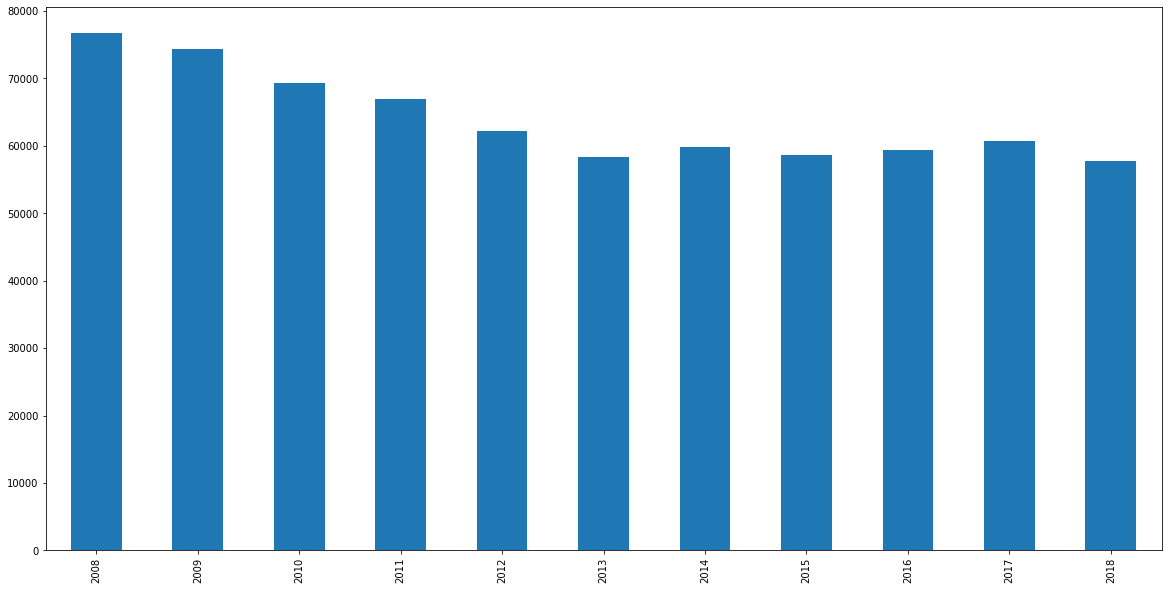

In [4]:
plot_number_accidents_per_years(df_accidents_per_year)

#### Accidents per months

We plotted the monthly distribution of accidents in the most recent year provided (2018). The number of accidents lays between 3458 accidents in February and 5698 accidents in October. Two main spikes can be noticed, one around the summer holidays (May to July) and one around the back-to-school period. Let us see if this trend is generalized over the years. 

In [5]:
year = 2018
data_2018 = YearLoader(year)

/Users/sinitame/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
df_accidents_per_months_2018 = get_number_accidents_per_months(data_2018)

In [7]:
df_accidents_per_months_2018

Jan     4350
Feb     3458
Mar     4152
Apr     4833
May     5055
June    5579
July    5241
Aug     4336
Sept    5532
Oct     5698
Nov     4883
Dec     4666
dtype: int64

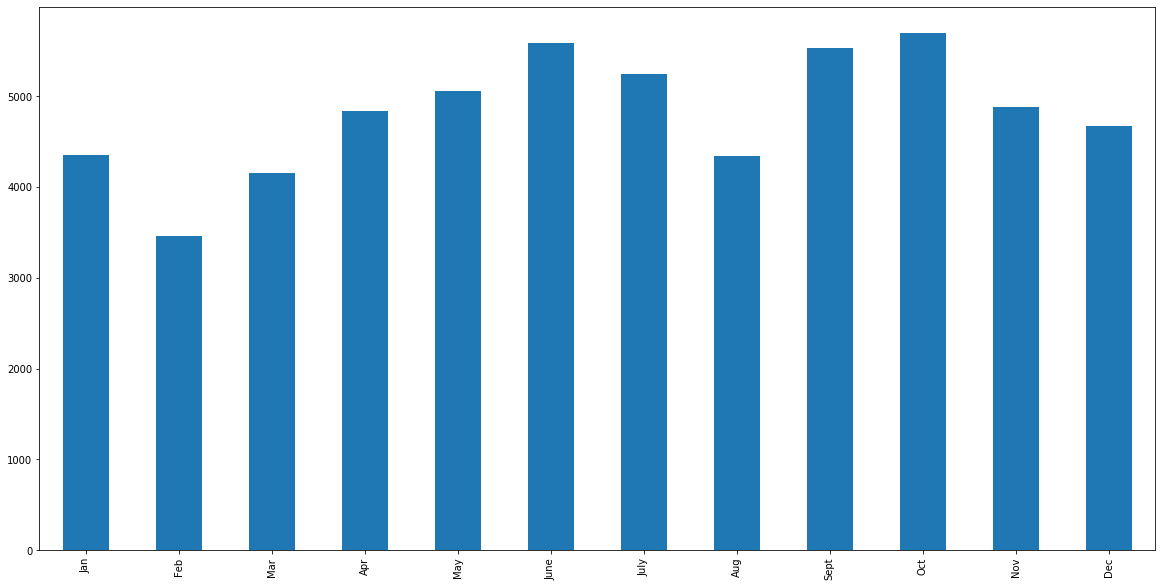

In [8]:
plot_number_accidents_per_months(df_accidents_per_months_2018)

### Evolution over the years

We notice that around the years, the above trend is repeated, with February being the month with the least accidents and October being the month with the most frequent ones.

In [9]:
df_all_accidents_per_months = get_number_accidents_per_months_all_years(2008, 2018)

/Users/sinitame/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


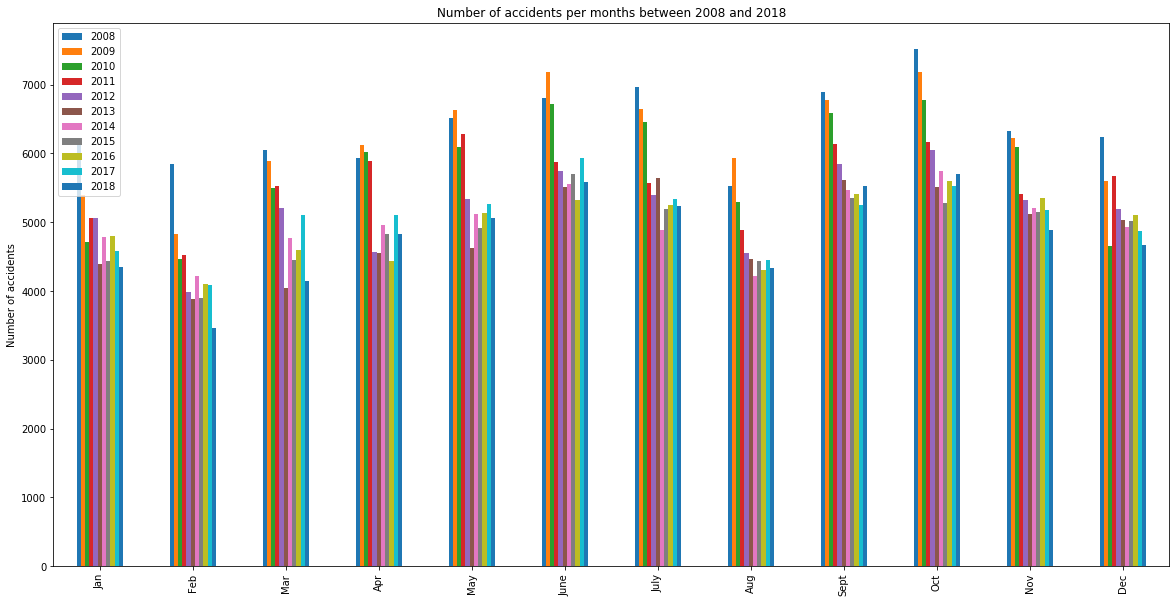

In [10]:
plot_all_years_accidents_per_months(df_all_accidents_per_months)

### Accidents gravity

The gravity of accidents is measured according to the level of damage done on humans (no damage (unscathed), slightly injured, injured, dead). The number of accidents in each class is inversely proportional to the level of damage (there are much more accidents where there has been no damage (around 60000 accidents/year) than the number of accidents where death has occurred (around 4000 accidents). The number of accidents related to death has been stable over the years. In the other classes (no damage and injury), the number of accidents follow the same trend : a clear decrease from 2008 to 2013, then a slight increase until 2018.

In [11]:
df_all_years_accidents_gravity = get_accidents_gravity_all_years(2008, 2018)

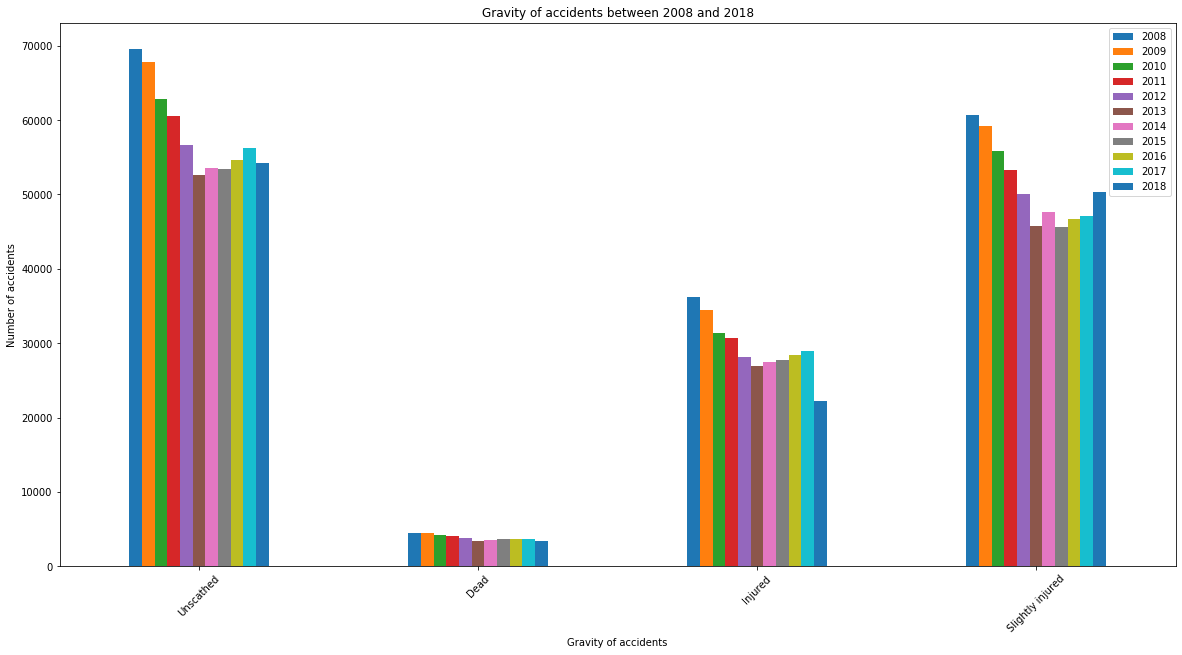

In [12]:
plot_all_years_accidents_gravity(df_all_years_accidents_gravity)

### Number of people per accidents

In [13]:
df_people_per_accidents_all = get_number_people_per_accidents_all_years(2008, 2018)

In [14]:
df_people_per_accidents_all.describe()

count    76767.000000
mean         2.226999
std          1.182808
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         58.000000
Name: Num_Acc, dtype: float64

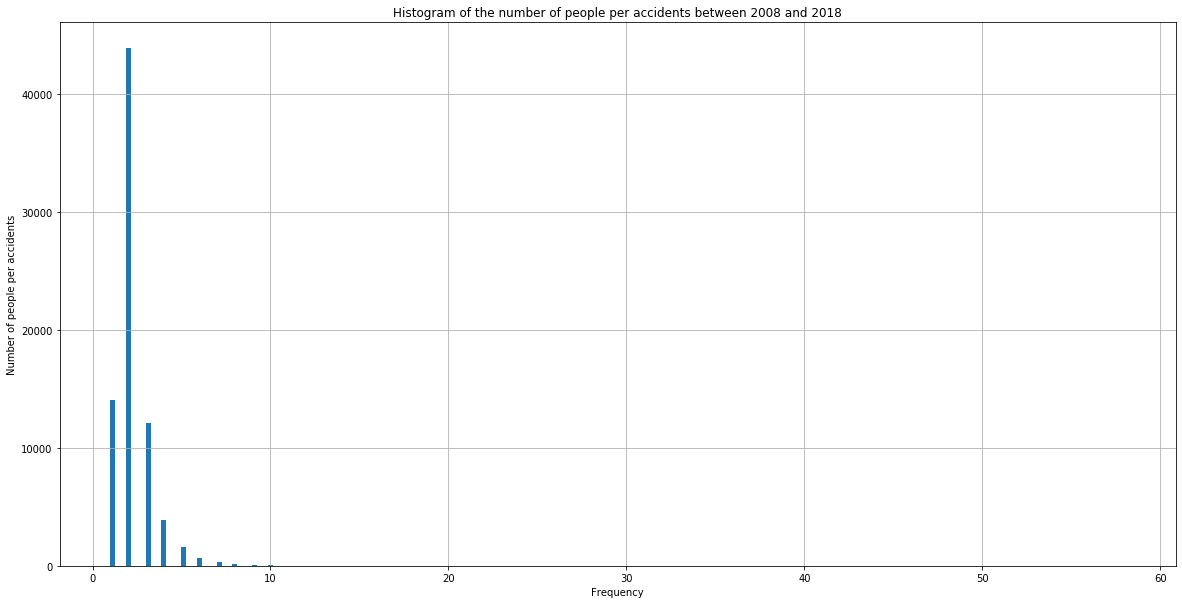

In [15]:
plot_number_people_per_accidents(df_people_per_accidents_all, multiple_years=True)

## 1. Be the right person ..

In [3]:
data_2018 = YearLoader(2018)
data_dead_alive = get_dead_alive_gender_df(data_2018)

data_dead_alive

/Users/ambroiserenaud/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


age_group  male_dead  male_alive  female_dead  female_alive
0      00-10         34        2283           25          1695
1      10-20        201        9258           59          4614
2      20-30        582       21350          116          9552
3      30-40        395       16570           77          6990
4      40-50        361       13621           67          5832
5      50-60        364       11273           73          5177
6      60-70        261        6086           92          3514
7      70-80        196        3238          103          2281
8      80-90        174        1636          136          1312
9     90-100         46         260           29           197
10   100-110          1           4            0             4
11         ?          0          24            0             6

### Population Pyramids

As an example, population pyramids for year 2018 :

The men and woman pyramid shows that the 20-30 years old are the people that are the most prone to be involved in accidents. 70% of the whole population involved in accidents are male. 3% of the male population dies in these accidents. The female pyramid shows two spikes in the number of dead women : 15% of the overall dead women at 20-30 years old and another 15% at 80-90 years old. 

Male population pyramid (dead vs alive)

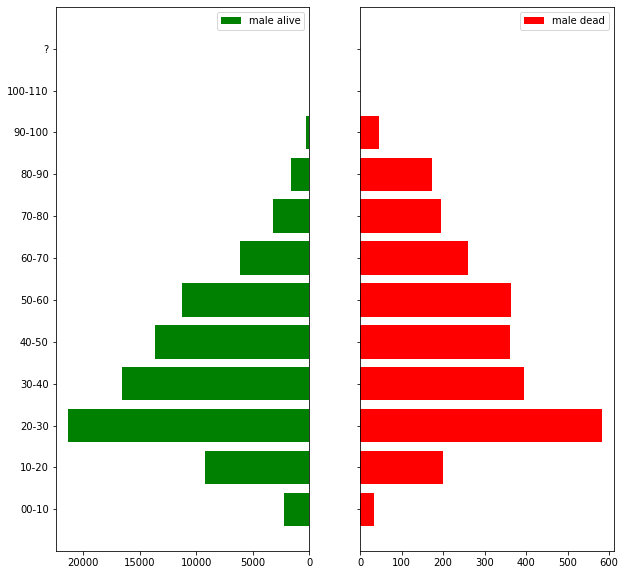

In [17]:
plot_pyramid_dead_alive_gender(data_dead_alive, male=True, figsize=(10,10), xlim = None)

Female drivers population pyramid (dead vs alive)

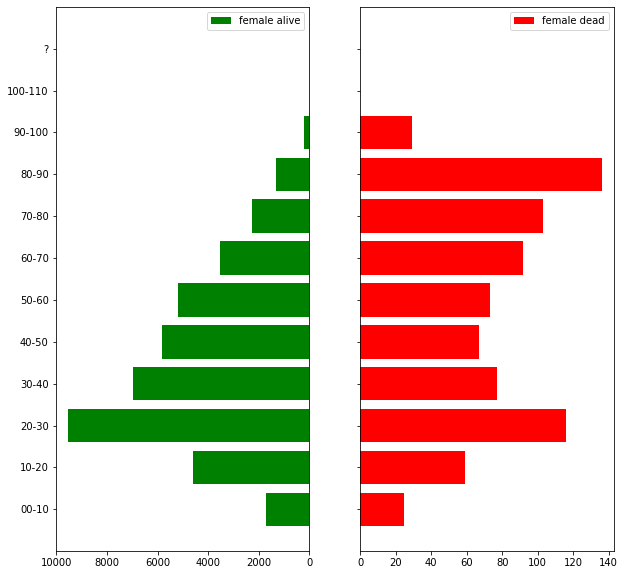

In [18]:
plot_pyramid_dead_alive_gender(data_dead_alive, male=False, female=True, figsize=(10,10), xlim = None)

### Types of vehicles

The graph distribution of vehicule types shows that the car is the vehicule where most accidents occur since 90% of the vehicules involved in accidents are cars. It is followed by the motorcycle with around 8% of overall number of vehicules.

In [10]:
data_vehicles = get_vehicles_type_df(data_2018, 8)

vehicles repartition over categories:

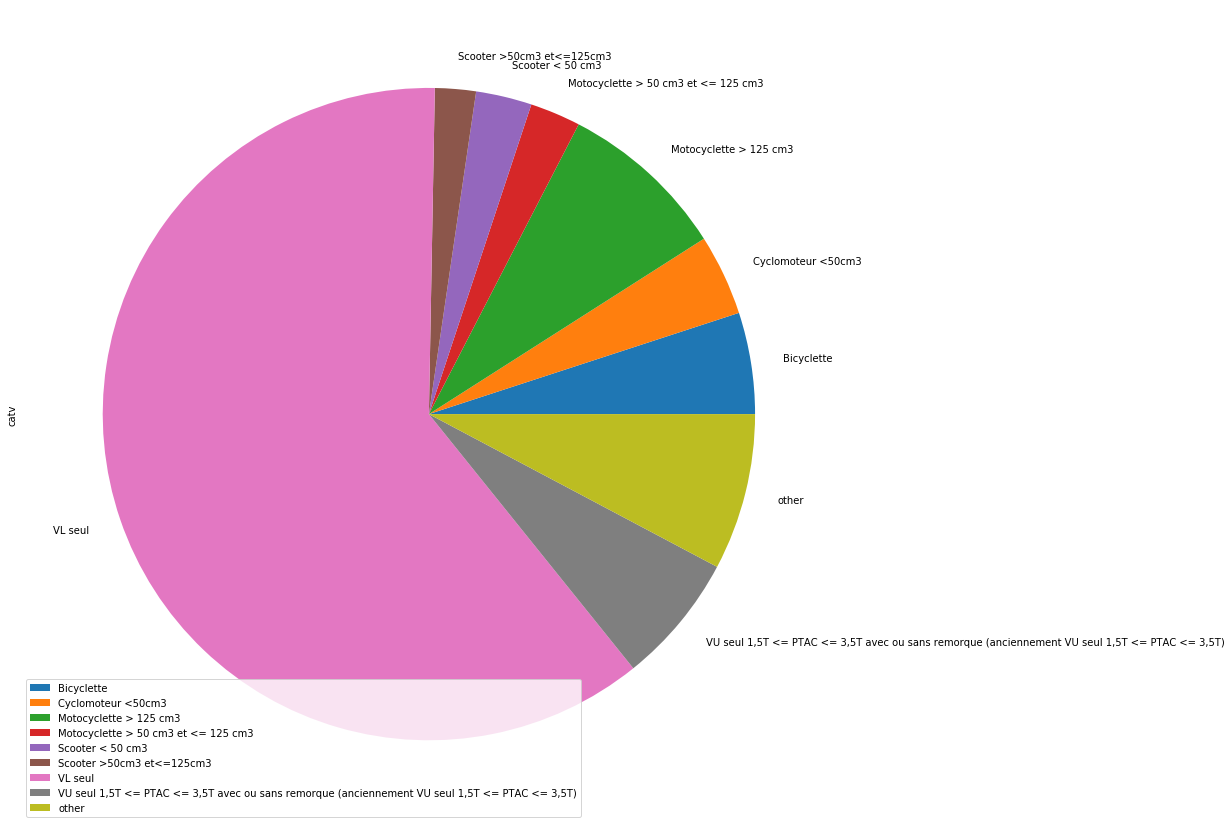

In [11]:
plot_vehicles_cat(data_vehicles, (15,15))

## 2. At the right place ..

### Accidents per regions/departments (map of France)

From this map, we observe that the French departments with the highest number of accidents are located where big cities are, where the population density is the biggest, for example around Paris and Marseille.

In [21]:
get_dep_count_df(data_2018)

dep  count
0   75   5591
1   13   3413
2   93   2735
3   94   2548
4   92   2520
..  ..    ...
95  09     90
96  48     76
97  46     75
98  23     61
99  90     58

[100 rows x 2 columns]

The map of france displaying accidents per departments is interactive

![SegmentLocal](map_france.gif "segment")

### Injury visualization in the car (Heatmap from the car top -> TODO (data story milestone))

Car place number:
![car place](car.jpg)

All injuries :

In [5]:
get_car_injuries_df(data_2018, dead_only=False)

place
1.0  96011
2.0  14465
3.0   2475
4.0   2049
9.0   1435
7.0   1297
8.0    688
5.0    610
6.0    179

Death only:

In [6]:
get_car_injuries_df(data_2018, dead_only=True)

place
1.0   2411
2.0    318
9.0     37
7.0     34
4.0     33
3.0     29
8.0     14
5.0      7
6.0      1

## 3. At the right moment ..

### Weather conditions

Accidents and percentage of the accidents given the weather for all year between 2008 and 2018

Most accidents happen during normal weather conditions (80%) and 10% happen during light rainfall surprisingly. This could be due to the fact that during good weather conditions, the driver is less focused on the road than when the weather conditions are bad, also the speed of the cars is greater in normal weather conditions which leads to a greater risk of accidents. For a deeper analysis, this graph should be weighted with the frequency of the weather condition during the year.

Looking at the percentage of killed people, the worst case would be driving under snow.

In [2]:
get_accident_per_weather_years(list(range(2008, 2019)))

accidents       perc
weather                                  
Normal                  568065  80.630693
Light rainfall           74927  10.635079
Heavy rainfall           15767   2.237955
Snow - hail               4134   0.586777
Fog - smoke               4531   0.643127
Strong wind - storm       1680   0.238458
Dazzling weather          7787   1.105281
Covered weather          22697   3.221594
Other                     4939   0.701038

Impact of the weather on the gravity of the accidents

In [3]:
grav_weather_over_years(list(range(2008, 2019)))

counts       perc
atm                 grav                                       
Normal              Unharmed                  521212  41.197840
                    Killed                     32855   2.596938
                    Injured and hospitalized  257930  20.387403
                    Slightly injured          453147  35.817820
Light rainfall      Unharmed                   65647  40.003047
                    Killed                      3753   2.286950
                    Injured and hospitalized   30620  18.658786
                    Slightly injured           64085  39.051217
Heavy rainfall      Unharmed                   14039  39.364625
                    Killed                      1108   3.106774
                    Injured and hospitalized    7783  21.823127
                    Slightly injured           12734  35.705473
Snow - hail         Unharmed                    4241  41.738018
                    Killed                       332   3.267395
                    Injured and hospitalized    2257  22.212381
                    Slightly injured            3331  32.782206
Fog - smoke         Unharmed                    3966  36.817675
                    Killed                       701   6.507612
                    Injured and hospitalized    3283  30.477163
                    Slightly injured            2822  26.197549
Strong wind - storm Unharmed                    1274  35.556796
                    Killed                       213   5.944739
                    Injured and hospitalized    1034  28.858498
                    Slightly injured            1062  29.639967
Dazzling weather    Unharmed                    7730  42.906306
                    Killed                       823   4.568162
                    Injured and hospitalized    5211  28.924290
                    Slightly injured            4252  23.601243
Covered weather     Unharmed                   20100  39.474459
                    Killed                      1953   3.835503
                    Injured and hospitalized   11441  22.469019
                    Slightly injured           17425  34.221018
Other               Unharmed                    3783  35.547829
                    Killed                       510   4.792332
                    Injured and hospitalized    2821  26.508175
                    Slightly injured            3528  33.151663

### Road conditions

Accidents and percentage of the accidents given the road conditions for all year between 2008 and 2018

The observations of the above graph match the road condition graphs. During the worst visible weather conditions more lethal accidents occures.

In [5]:
get_accident_per_road_conditions_years(list(range(2008, 2019)))

accidents       perc
surface                                     
Normal                     544611  77.505280
Wet                        121543  17.297161
Puddles                      1111   0.158110
Flooded                       410   0.058348
Snowy                        2028   0.288611
Muddy                         388   0.055217
Icy                          4381   0.623474
Greasy substance - oil       1658   0.235955
Other                       26546   3.777844

Impact of the road conditions on the gravity of the accidents

In [6]:
grav_surface_over_years(list(range(2008, 2019)))

counts       perc
surf                   grav                                         
Flooded                Injured and hospitalized     230.0  25.302530
                       Killed                        64.0   7.040704
                       Slightly injured             286.0  31.463146
                       Unharmed                     329.0  36.193619
Greasy substance - oil Injured and hospitalized     712.0  23.451910
                       Killed                        83.0   2.733860
                       Slightly injured            1471.0  48.451910
                       Unharmed                     770.0  25.362319
Icy                    Injured and hospitalized    2747.0  29.477412
                       Killed                       452.0   4.850306
                       Slightly injured            3086.0  33.115141
                       Unharmed                    3034.0  32.557141
Muddy                  Injured and hospitalized     263.0  38.506589
                       Killed                        35.0   5.124451
                       Slightly injured             200.0  29.282577
                       Unharmed                     185.0  27.086384
Normal                 Injured and hospitalized  250630.0  20.540193
                       Killed                     32375.0   2.653269
                       Slightly injured          431205.0  35.339082
                       Unharmed                  505983.0  41.467456
Other                  Injured and hospitalized   11255.0  20.622618
                       Killed                      1190.0   2.180446
                       Slightly injured           20795.0  38.102829
                       Unharmed                   21336.0  39.094107
Puddles                Injured and hospitalized     620.0  29.779059
                       Killed                         NaN        NaN
                       Slightly injured             771.0  37.031700
                       Unharmed                     691.0  33.189241
Snowy                  Injured and hospitalized    1112.0  21.846758
                       Killed                       169.0   3.320236
                       Slightly injured            1665.0  32.711198
                       Unharmed                    2144.0  42.121807
Wet                    Injured and hospitalized   53660.0  19.964952
                       Killed                      7718.0   2.871590
                       Slightly injured          101690.0  37.835183
                       Unharmed                  105703.0  39.328276

## 4. And keep it secure

Since less data was collected on people not wearing a seatbelt, we cannot compare these tabs horizontally. Considering that the ratio of people in each class over the whole population is the same for both plots, we can say that the proportion of killed people is decrease by 17% when a seatbelt is worn and the proportion of injured and hospitalized people is decrease by 20%. 
Considering the motorcycles equipment, wearing a helmet prevents death and injury decreasing the proportion of death by 4% and that of injury by 12%.
Considering the reflective devices, having one prevents death and injury decreasing the proportion of death by 6% and that of injury by 20%.

### Security equipment usage
#### Presence of seatbelt

In [7]:
code_seatbelt    = [11] # Seatbelt attached
code_no_seatbelt = [12] # No setbelt
years = list(range(2008, 2019)) # All years

In [8]:
get_gravity_over_years(code_seatbelt, years)

counts       perc
grav                                       
Unharmed                  506165  57.268007
Killed                     15951   1.804712
Injured and hospitalized  119810  13.555422
Slightly injured          241927  27.371859

In [9]:
get_gravity_over_years(code_no_seatbelt, years)

counts       perc
grav                                       
Unharmed                    5828  24.080654
Killed                      4534  18.733989
Injured and hospitalized    8324  34.393852
Slightly injured            5516  22.791505

More **+17%** killed when the seatbelt is not attached

#### Presence of helmet

In [11]:
code_helmet    = [21]
code_no_helmet = [22]

In [12]:
get_gravity_over_years(code_helmet, years)

counts       perc
grav                                       
Unharmed                   25085   8.709888
Killed                      9777   3.394721
Injured and hospitalized  100725  34.973230
Slightly injured          152419  52.922161

In [13]:
get_gravity_over_years(code_no_helmet, years)

counts       perc
grav                                       
Unharmed                    1001   5.998322
Killed                      1203   7.208773
Injured and hospitalized    7777  46.602349
Slightly injured            6707  40.190556

More killed and hospitalized passengers when the helmet was not present

#### Presence of reflective device

In [16]:
code_refl_dev    = [41]
code_no_refl_dev = [42]

In [17]:
get_gravity_over_years(code_refl_dev, years)

counts       perc
grav                                       
Unharmed                     334  16.065416
Killed                       112   5.387205
Injured and hospitalized     597  28.715729
Slightly injured            1036  49.831650

In [19]:
get_gravity_over_years(code_no_refl_dev, years)

counts       perc
grav                                       
Unharmed                      75   4.564820
Killed                       191  11.625076
Injured and hospitalized     740  45.039562
Slightly injured             637  38.770542

**+6%** killed and almost **+20%** hospitalized when there was no relfective device

## Conclusion

For now, we can answer to the question : How data can help you survive ? Being in the worst case scenario (otherwise it would be meaningless) : Driving without seatbelt and lights under the snow with puddles on the road. According to our insights, you have to be : a woman, between 18 and 20 years old, driving in normal weather, on a normal road, wearing a seatbelt. The idea of our future work would be to be to refine these results.